# Final Project Submission: Real Estate Linear Regression Model Analysis
__(Phase 2)__

* Student Name: Tenicka Norwood
* Program Pace: self paced
* Scheduled Project Review Time: 
* Instructor name: Joe Comeaux
* Blog post Url:https://medium.com/@tenicka.norwood/working-with-data-while-trying-to-stay-dry-fa4ebf5e5f64



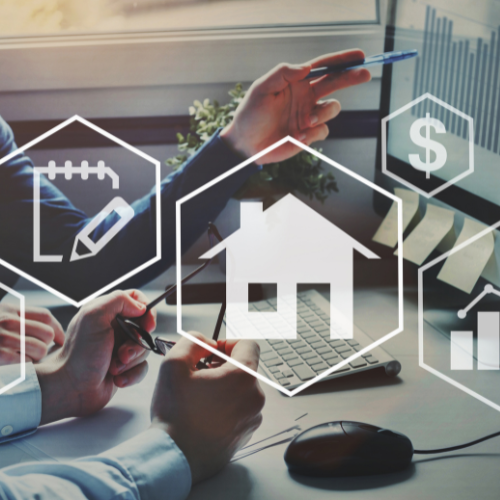
Photo by: anyaberkut on [Canva](https://www.canva.com)


# Business Understanding

LandingPad is a real estate business that helps families with school-aged children relocate to Kings County and find the perfect home to meet their families needs. LandingPad provides potential homeowners with home purchase options within their ideal budget. 

The business case for this project is that I have been hired by LandingPad to accurately predict the housing prices within the Kings County Housing Market. Executives at LandingPad want to launch a multimedia campaign to reach their target audience of young families moving to the Kings County Area and want a reliable model that can be refined over time as more information becomes available. 

Primarily, I will start by identifying the characteristics of homes that increase housing costs. The effect of each relevant attribute will then be identified and communicated to the team at LandingPad. Then, I will use this to build a linear regression model that I can use to answer the following guiding questions: 

* Which neighborhoods have the highest average home price?
* How does the number of bedrooms affect the sale price of a home?
* How does proximity to a highly rated school affect the sale price of a home?

# Data Understanding

# Data Preparation

# Import libraries and Visualization Packages
Importing libraries at the beginning allows access to modules and other tools throughout this project that help to make the tasks within this project manageable to implement. The main libraries that will be used within this project include:

* <code>sqlite3</code>: a library that provides a SQL interface that allows accessing and manipulating SQL database
* <code>pandas</code>: a data analysis and manipulation library which allows for flexible reading, writing, and reshaping of data
* <code>numpy</code>: a key library that brings the computationaly power of languages like C to Python
* <code>matplotlib</code>: a comprehensive visualization library
* <code>seaborn</code>: a data visualization library based on matplotlib

In [15]:
# Import libraries and visualization packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Read in data from  <code>kc_house_data.csv</code> using <code>.read_csv()</code> from the pandas library.

In [3]:
# Read in the data
# Read Data from Kings County House Data

df = pd.read_csv('data/kc_house_data.csv')

In [4]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.00         3       1.00         1180   
1  6414100192   12/9/2014 538000.00         3       2.25         2570   
2  5631500400   2/25/2015 180000.00         2       1.00          770   
3  2487200875   12/9/2014 604000.00         4       3.00         1960   
4  1954400510   2/18/2015 510000.00         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650    1.00        NaN  NONE  ...      7 Average       1180   
1      7242    2.00         NO  NONE  ...      7 Average       2170   
2     10000    1.00         NO  NONE  ...  6 Low Average        770   
3      5000    1.00         NO  NONE  ...      7 Average       1050   
4      8080    1.00         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0            0.0     1955          0.00    98178 47.51 -122.26           1340   
1          400.0     1951       1991.00    98125 47.72 -122.32           1690   
2            0.0     1933           nan    98028 47.74 -122.23           2720   
3          910.0     1965          0.00    98136 47.52 -122.39           1360   
4            0.0     1987          0.00    98074 47.62 -122.05           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
df.describe()

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21597.00   21597.00  21597.00   21597.00     21597.00   21597.00   
mean  4580474287.77  540296.57      3.37       2.12      2080.32   15099.41   
std   2876735715.75  367368.14      0.93       0.77       918.11   41412.64   
min      1000102.00   78000.00      1.00       0.50       370.00     520.00   
25%   2123049175.00  322000.00      3.00       1.75      1430.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900490.00  645000.00      4.00       2.50      2550.00   10685.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors  sqft_above  yr_built  yr_renovated  zipcode      lat     long  \
count 21597.00    21597.00  21597.00      17755.00 21597.00 21597.00 21597.00   
mean      1.49     1788.60   1971.00         83.64 98077.95    47.56  -122.21   
std       0.54      827.76     29.38        399.95    53.51     0.14     0.14   
min       1.00      370.00   1900.00          0.00 98001.00    47.16  -122.52   
25%       1.00     1190.00   1951.00          0.00 98033.00    47.47  -122.33   
50%       1.50     1560.00   1975.00          0.00 98065.00    47.57  -122.23   
75%       2.00     2210.00   1997.00          0.00 98118.00    47.68  -122.12   
max       3.50     9410.00   2015.00       2015.00 98199.00    47.78  -121.31   

       sqft_living15  sqft_lot15  
count       21597.00    21597.00  
mean         1986.62    12758.28  
std           685.23    27274.44  
min           399.00      651.00  
25%          1490.00     5100.00  
50%          1840.00     7620.00  
75%          2360.00    10083.00  
max          6210.00   871200.00

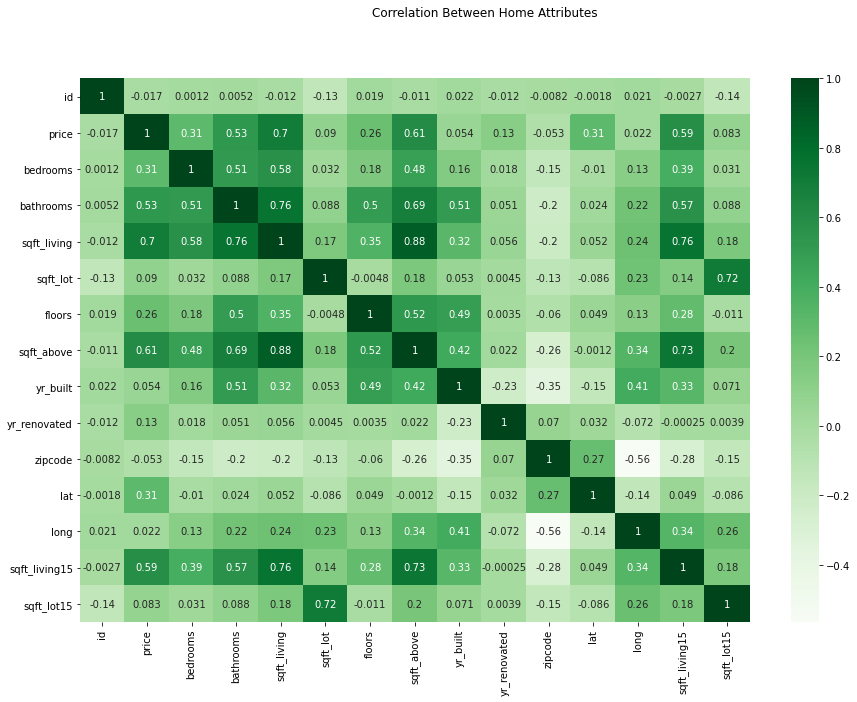

In [10]:
# Review correlations on filtered dataset

plt.figure(figsize = (15,10)).suptitle("Correlation Between Home Attributes")
sns.heatmap(df.corr(), annot = True, cmap = "Greens");

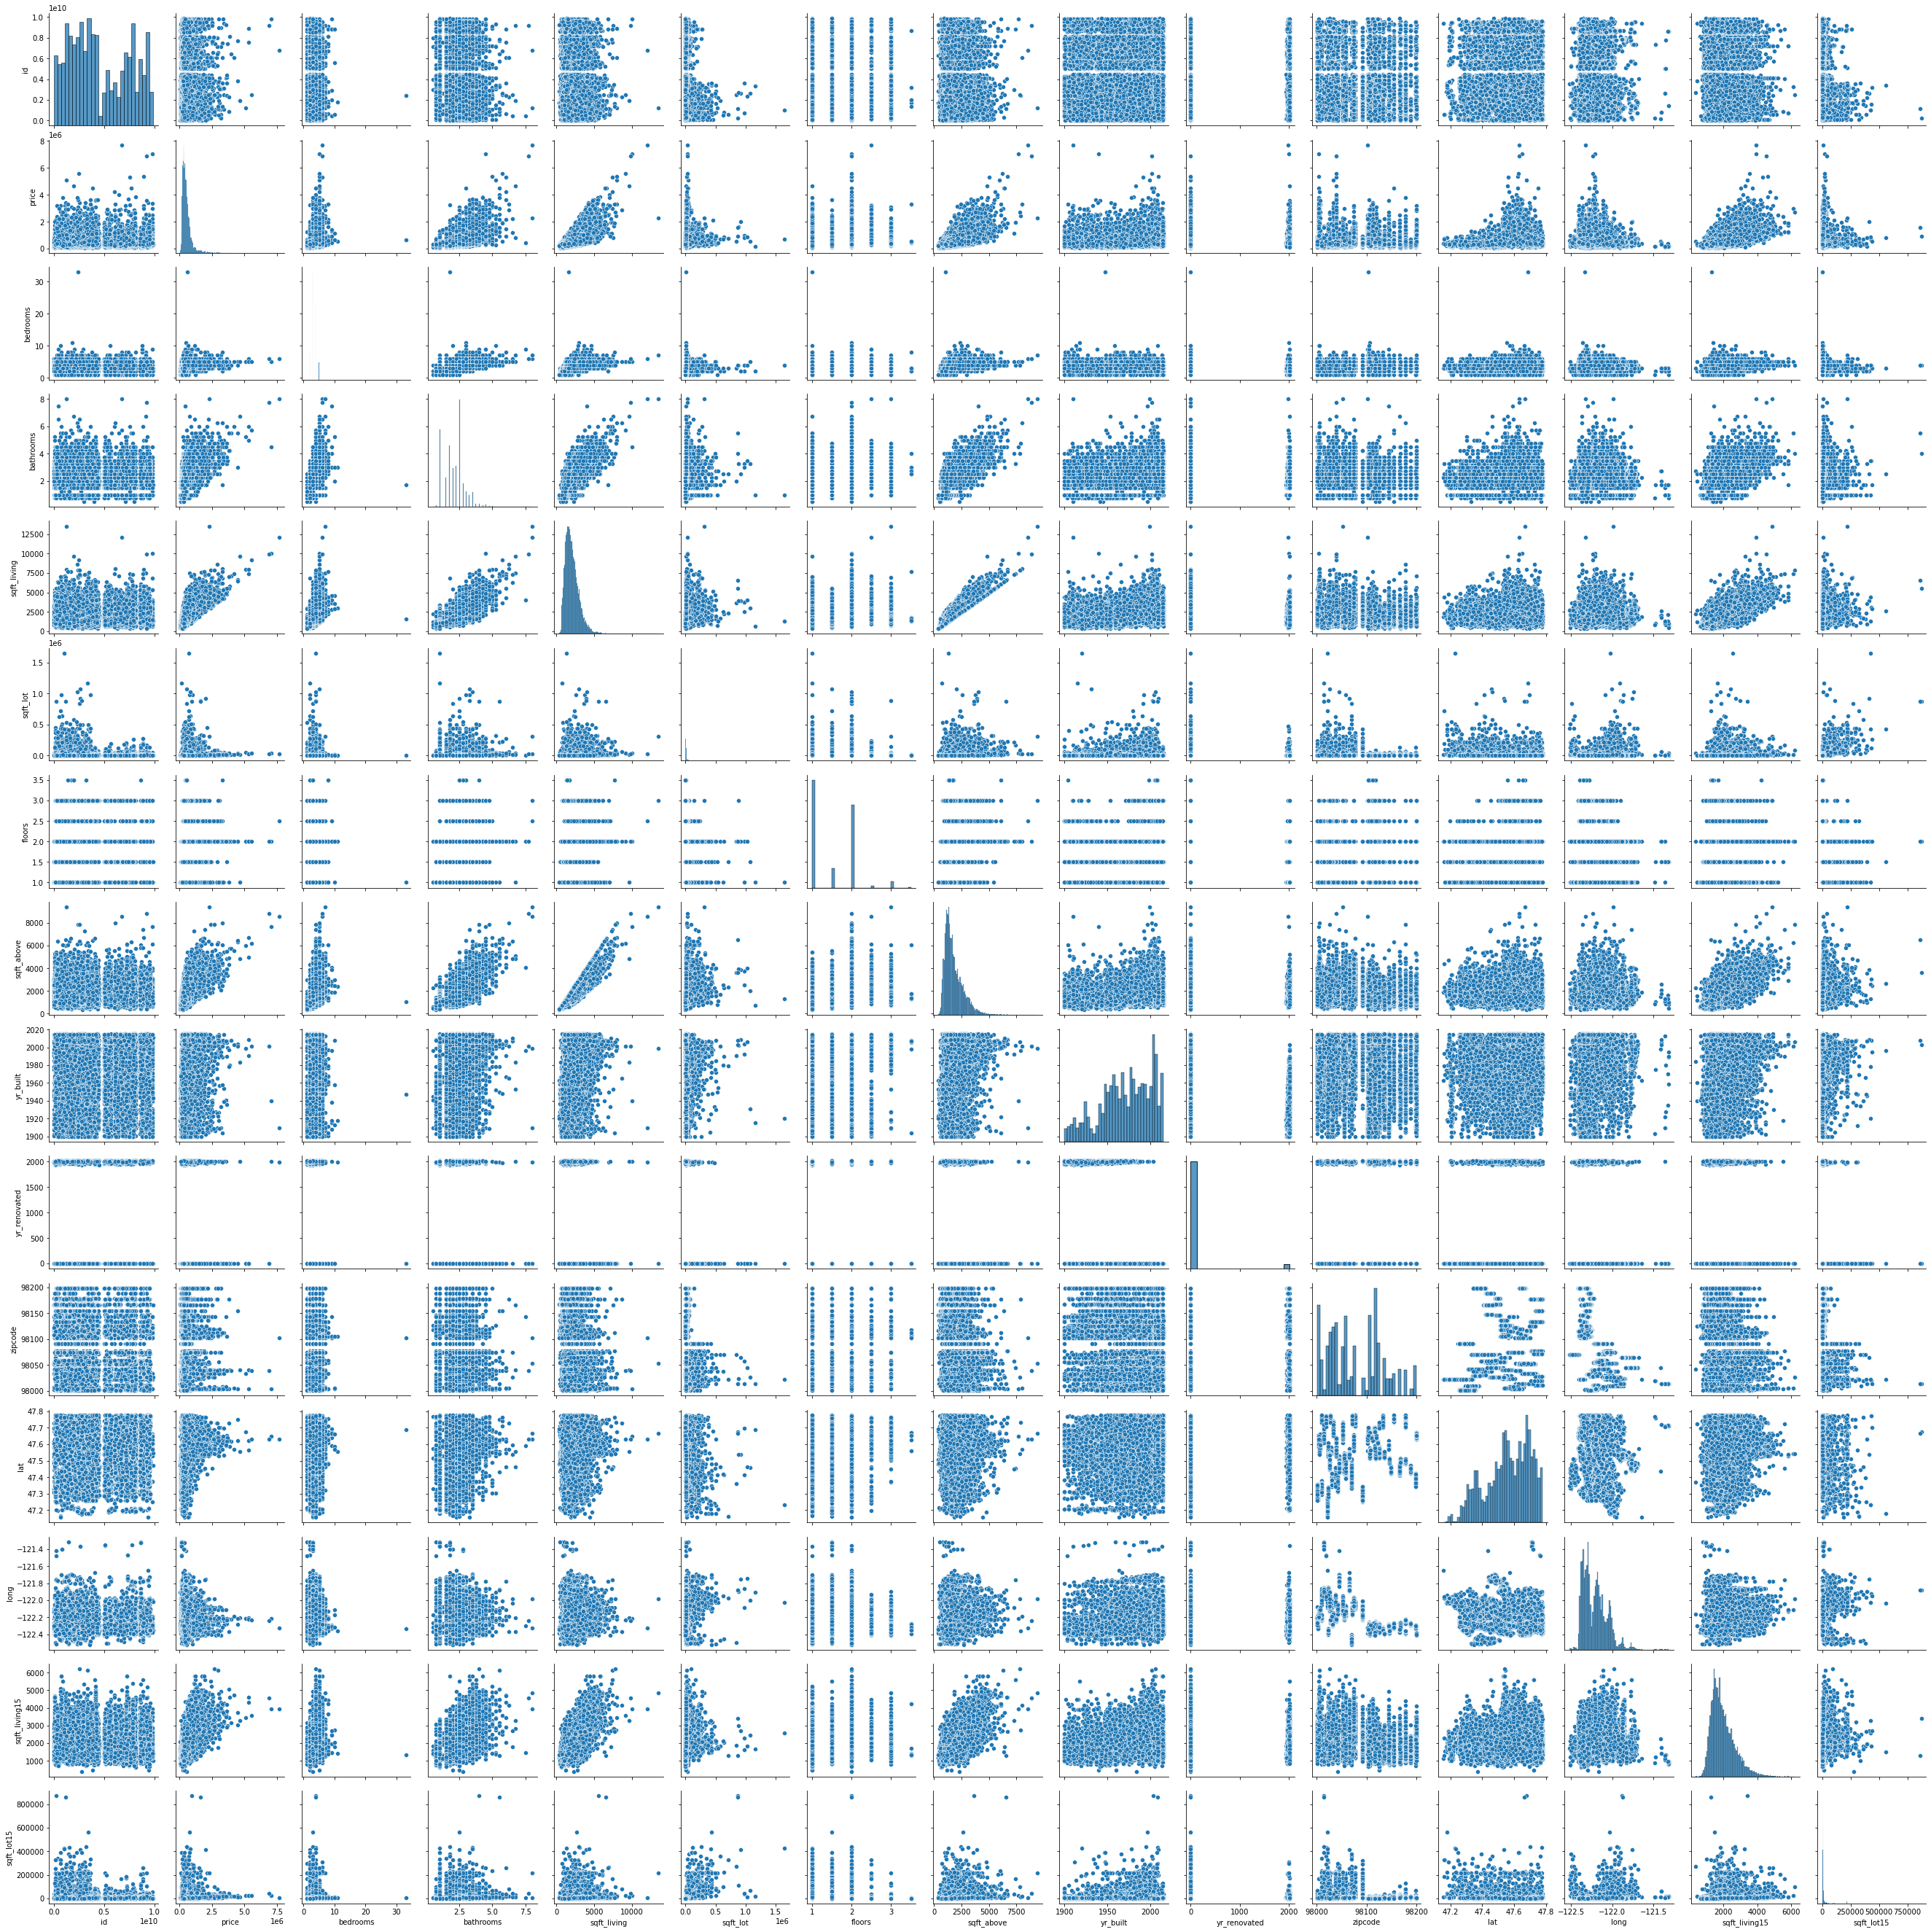

In [12]:
# Create a pairplot
sns.pairplot(df)

In [ ]:
df_filtered = 

# Modeling

In [6]:
import pandas as pd
from selenium import webdriver

url = "https://www.greatschools.org/washington/seattle/schools/?gradeLevels%5B%5D=e&gradeLevels%5B%5D=m&gradeLevels%5B%5D=h&st%5B%5D=public_charter&st%5B%5D=public&st%5B%5D=charter&view=table"

driver = webdriver.Chrome('C:\chromedriver_win32\chromedriver.exe')
driver.get(url)

html = driver.page_source

table = pd.read_html(html)
df = table[0]

driver.close()

<ipython-input-6-fb153b65f4bd>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:\chromedriver_win32\chromedriver.exe')


In [8]:
df.columns

Index(['School', 'Type', 'Grades', 'Total students enrolled',
       'Students per teacher', 'Reviews', 'District'],
      dtype='object')

In [22]:
from requests import get
url = 'https://www.niche.com/k12/search/best-schools/c/king-county-wa/?academicsGrade=a&diversityGrade=a&gradeLevel=elementary&gradeLevel=middle&gradeLevel=high&sportsGrade=a&teachersGrade=a&type=traditional&type=charter&type=magnet'
response = get(url)
print(response.text[:500])

C:\ProgramData\Anaconda3\envs\learn-env\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


<!DOCTYPE html> <html lang="en"> <head> <meta charset="utf-8"> <meta name="viewport" content="width=device-width, initial-scale=1"> <title>Access to this page has been denied.</title> <link href="https://fonts.googleapis.com/css?family=Open+Sans:300" rel="stylesheet"> <style> html, body { margin: 0; padding: 0; font-family: 'Open Sans', sans-serif; color: #000; } a { color: #c5c5c5; text-decoration: none; } .container { align-items: center; display: flex; flex: 1; justify-content: space-between;


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   School                   25 non-null     object
 1   Type                     25 non-null     object
 2   Grades                   25 non-null     object
 3   Total students enrolled  25 non-null     int64 
 4   Students per teacher     25 non-null     object
 5   Reviews                  25 non-null     object
 6   District                 25 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.5+ KB


# Evaluation

# Deployment

# Insights

# Recommendations

In [21]:
for i in range (0, len(df)):
    print(df['School'][i][45:90])

144 Northwest 80th Street, Seattle, WA, 98117
ards & BadgesCollege Success Award2022See all
 27th Avenue West, Seattle, WA, 98199 Homes f
sAwards & BadgesCollege Success Award2022, 20
20 Northeast 85th Street, Seattle, WA, 98115 
20 Northwest 75th Street, Seattle, WA, 98117 
h 90th Street, Seattle, WA, 98103 Homes for s
, Seattle, WA, 98168 Homes for sale
9th Avenue Southwest, Seattle, WA, 98116 Home
th Columbian Way, Seattle, WA, 98108 Homes fo
h Avenue West, Seattle, WA, 98119 Homes for s
1 Linden Avenue North, Seattle, WA, 98103 Hom
ortheast 75th Street, Seattle, WA, 98115 Home
645 California Avenue Southwest, Seattle, WA,
l4530 46th Avenue Northeast, Seattle, WA, 981
 East Mercer Street, Seattle, WA, 98102 Homes
ool520 Northeast Ravenna Boulevard, Seattle, 
t Avenue West, Seattle, WA, 98119 Homes for s
09 22nd Avenue East, Seattle, WA, 98112 Homes
l9018 24th Avenue Northwest, Seattle, WA, 981
ol5013 Southwest Dakota Street, Seattle, WA, 
ool5601 4th Avenue Northwest, Seattle, WA, 9

In [11]:
from requests import get
url = 'https://www.niche.com/k12/search/best-schools/c/king-county-wa/?academicsGrade=a&diversityGrade=a&gradeLevel=elementary&gradeLevel=middle&gradeLevel=high&sportsGrade=a&teachersGrade=a&type=traditional&type=charter&type=magnet'
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "Accept-Language": "en-US,en;q=0.5", "Accept-Encoding": "gzip, deflate", "DNT": "1", "Connection": "close", "Upgrade-Insecure-Requests": "1"}
response = get(url, headers = headers)
print(response.text[:500])

<!DOCTYPE html><html lang="en" data-reactroot=""><head><meta charset="utf-8"><meta http-equiv="x-ua-compatible" content="ie=edge"><meta name="viewport" content="width=device-width, initial-scale=1 maximum-scale=5.0, minimum-scale=0.86"><meta property="fb:app_id" content="298822776951871"><meta property="og:site_name" content="Niche"><meta property="og:locale" content="en_US"><meta name="msapplication-TileColor" content="#FFFFFF"><meta name="msapplication-TileImage" content="https://d33a4decm84gs


In [12]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)
#output:
bs4.BeautifulSoup

bs4.BeautifulSoup

In [6]:
import bs4


In [7]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

type(html_soup)
#output:
bs4.BeautifulSoup

bs4.BeautifulSoup

In [13]:
print(html_soup.prettify())

<!DOCTYPE html>
<html data-reactroot="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1 maximum-scale=5.0, minimum-scale=0.86" name="viewport"/>
  <meta content="298822776951871" property="fb:app_id"/>
  <meta content="Niche" property="og:site_name"/>
  <meta content="en_US" property="og:locale"/>
  <meta content="#FFFFFF" name="msapplication-TileColor"/>
  <meta content="https://d33a4decm84gsn.cloudfront.net/static/favicons/favicon-144.png" name="msapplication-TileImage"/>
  <meta content="https://d33a4decm84gsn.cloudfront.net/static/favicons/browserconfig.xml" name="msapplication-config"/>
  <meta content="#59a44d" name="theme-color"/>
  <meta content="strict-origin-when-cross-origin" name="referrer"/>
  <script>
   window.nicheEnvVars={"braze":{"key":"97a5be8e-e2ba-4f2c-9159-9ae910fa9648"},"clientLogIntervalMs":10000,"clientLoggingEndpoint":"/paul-bunyan","contactFormTestingEma

In [16]:

test = pd.read_html('https://www.greatschools.org/search/search.zipcode?gradeLevels%5B%5D=e&gradeLevels%5B%5D=m&gradeLevels%5B%5D=h&sort=rating&st%5B%5D=public_charter&st%5B%5D=public&st%5B%5D=charter&view=table&zip=98001')


ImportError: html5lib not found, please install it